In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [2]:
original_data = pd.read_csv(filepath_or_buffer='./Downloads/CSUSHPINSA.csv', index_col='DATE', parse_dates=True)
original_data.head()

,CSUSHPINSA
DATE,
1987-01-01,63.755
1987-02-01,64.155
1987-03-01,64.490
1987-04-01,64.995
1987-05-01,65.569


In [3]:
def plot_data_properties(data, ts_plot_name="Time Series plot"):
    '''
    Summary:
    -------
    Plots various plots, including time series, autocorrelation,
    partial autocorrelation and distribution plots of data.
    
    Parameters:
    ----------
    ts_plot_name(String): The name of the time series plot
    data(pd.Dataframe, pd.Series, array): Time Series Data
    
    Returns:
    --------
    None
    
    '''
    plt.figure(figsize=(16,4))
    plt.plot(data)
    plt.title(ts_plot_name)
    plt.ylabel('Sales')
    plt.xlabel('Year')
    fig, axes = plt.subplots(1,3,squeeze=False)
    fig.set_size_inches(16,4)
    plot_acf(data, ax=axes[0,0], lags=48);
    plot_pacf(data, ax=axes[0,1], lags=48);
    sns.distplot(data, ax=axes[0,2])
    axes[0,2].set_title("Probability Distribution")

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

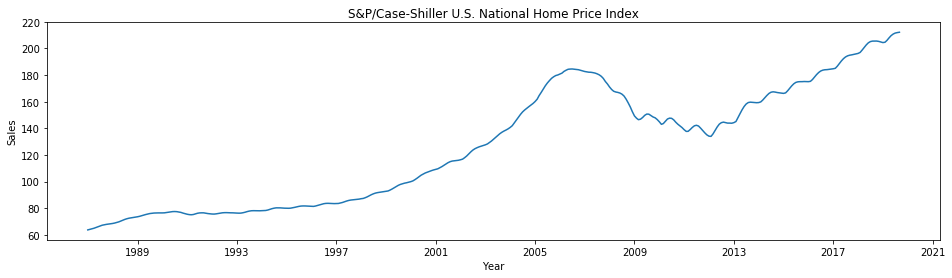

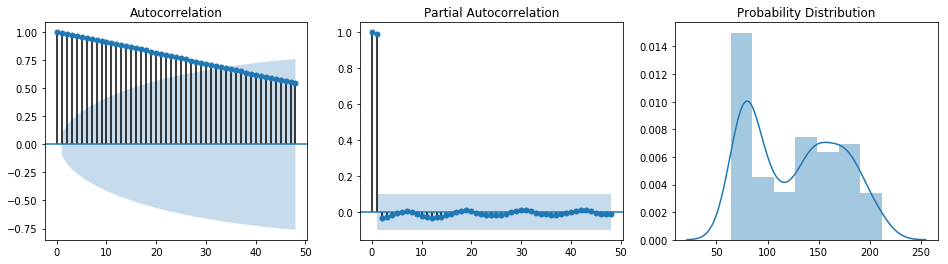

In [5]:
plot_data_properties(original_data, "S&P/Case-Shiller U.S. National Home Price Index")

In [6]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(data):
    '''
    Summary:
    -------
    Performs Adfuller test on given time series data to test stationarity.
    p_val >= 0.05 means the data is not stationary, otherwise (p_val < 0.05) it is stationary.
    
    Parameters:
    data(pd.Dataframe, pd.Series. np.array): Time series data to be tested
    
    Return:
    ------
    '''
    p_val=adfuller(data['CSUSHPINSA'])[1]
    if p_val >= 0.05:
        print("Time series data is not stationary. Adfuller test pvalue={}".format(p_val))
    else:
        print("Time series data is stationary. Adfuller test pvalue={}".format(p_val))

In [7]:
test_stationarity(original_data)

Time series data is not stationary. Adfuller test pvalue=0.8962920364936334


In [8]:
test_stationarity(original_data.diff()[1:])

Time series data is not stationary. Adfuller test pvalue=0.05111647132219668


In [9]:
test_stationarity(original_data.diff(2)[2:])

Time series data is stationary. Adfuller test pvalue=0.04132857075120367


In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [11]:
def plot_seasonal_decompose(data, model):
    '''
    Summary:
    -------
    Plots trend, seasonality and residuals with bigger plot size=(10,2)
    
    Parameters:
    ----------
    data(pd.Dataframe, pd.Series): time series data
    
    Return:
    ------
    decomposition(obj): return value of statsmodels.tsa.seasonal.seasonal_decompose
    '''
    decomposition = seasonal_decompose(data,model=model)
    decomposition.trend.plot(figsize=(10,2), title='Trend');
    decomposition.seasonal.plot(figsize=(10,2), title='Seasonality');
    decomposition.resid.plot(figsize=(10,2), title='Residuals');
    return decomposition

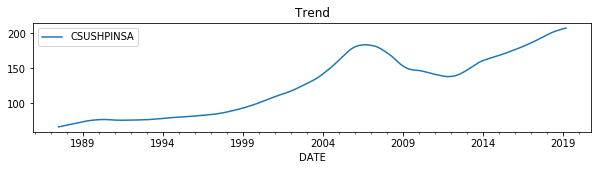

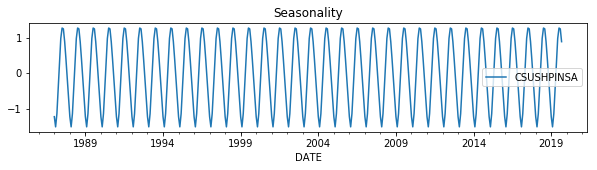

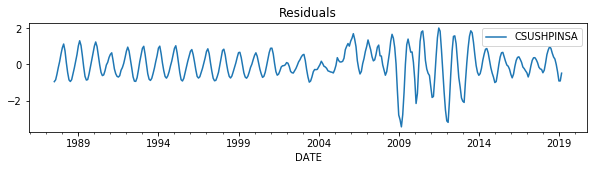

In [12]:
plot_seasonal_decompose(original_data, 'additive')

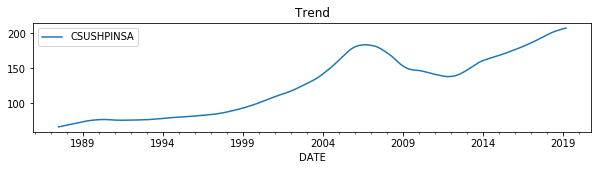

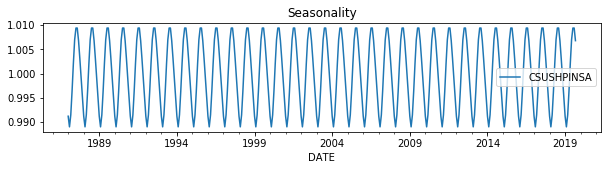

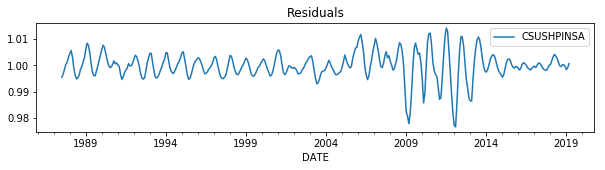

In [13]:
plot_seasonal_decompose(original_data, 'multiplicative')

In [19]:
import numpy as np

In [26]:
test_stationarity(np.log(original_data).diff(3)[3:])

Time series data is not stationary. Adfuller test pvalue=0.06849674490323329


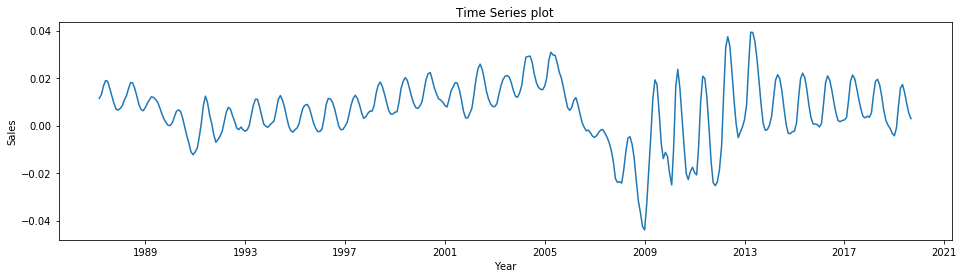

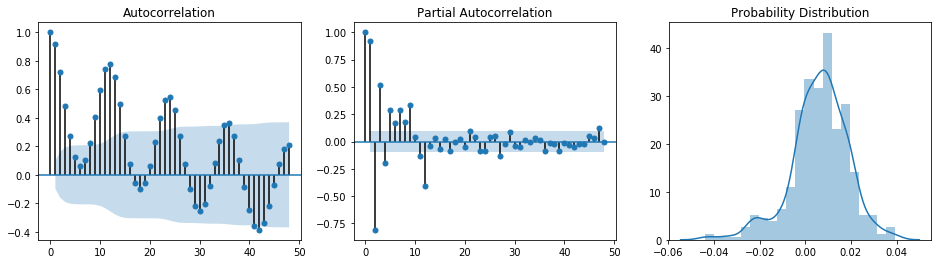

In [30]:
plot_data_properties(np.log(original_data).diff(2)[2:])

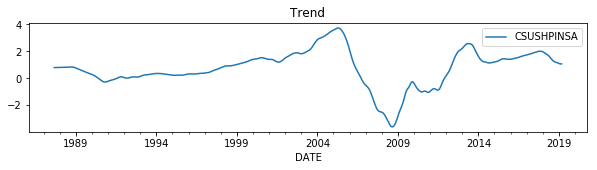

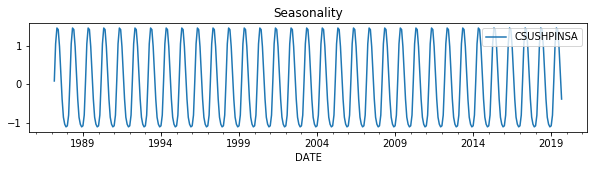

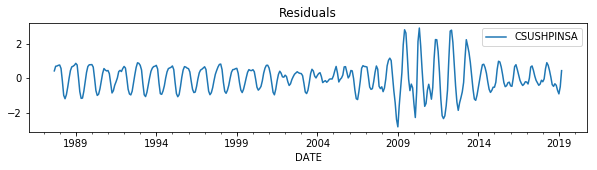

In [38]:
plot_seasonal_decompose(original_data.diff(2)[2:], "additive")

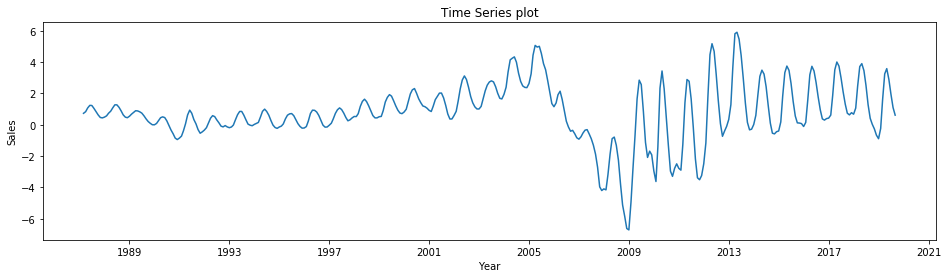

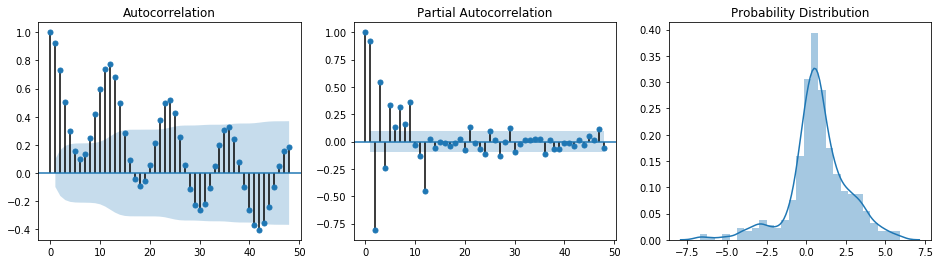

In [14]:
plot_data_properties(original_data.diff(2)[2:])

In [56]:
training_data = original_data[:-9]
test_data = original_data[-9:]

In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [53]:
def best_arima_model(train_data,p,q,d_=2):
    best_model_aic = np.Inf 
    best_model_bic = np.Inf 
    best_model_hqic = np.Inf
    best_model_order = (0,0,0)
    models = []
    for p_ in p:
        for q_ in q:
                    try:
                        no_of_lower_metrics = 0
                        model = ARIMA(endog=train_data,order=(p_,d_,q_)).fit()
                        models.append(model)
                        if model.aic <= best_model_aic: no_of_lower_metrics+=1
                        if model.bic <= best_model_bic: no_of_lower_metrics+=1
                        if model.hqic <= best_model_hqic:no_of_lower_metrics+=1
                        if no_of_lower_metrics >= 2:
                            best_model_aic = np.round(model.aic,0)
                            best_model_bic = np.round(model.bic,0)
                            best_model_hqic = np.round(model.hqic,0)
                            best_model_order = (p_,d_,q_,)
                            current_best_model = model
                            models.append(model)
                            print("Best model so far: ARIMA" +  str(best_model_order) + 
                                  " AIC:{} BIC:{} HQIC:{}".format(best_model_aic,best_model_bic,best_model_hqic)+
                                  " resid:{}".format(np.round(np.exp(current_best_model.resid).mean(),3)))

                    except:
                        pass

    print('\n')
    print(current_best_model.summary())                
    return current_best_model, models

In [57]:
best_model, models = best_arima_model(training_data, p = range(8), q=range(8), d_=2)

Best model so far: ARIMA(0, 2, 0) AIC:412.0 BIC:420.0 HQIC:415.0 resid:1.121
Best model so far: ARIMA(0, 2, 1) AIC:307.0 BIC:319.0 HQIC:312.0 resid:1.095
Best model so far: ARIMA(0, 2, 2) AIC:250.0 BIC:266.0 HQIC:256.0 resid:1.077
Best model so far: ARIMA(0, 2, 4) AIC:240.0 BIC:264.0 HQIC:250.0 resid:1.07
Best model so far: ARIMA(0, 2, 5) AIC:220.0 BIC:248.0 HQIC:231.0 resid:1.067
Best model so far: ARIMA(0, 2, 6) AIC:208.0 BIC:240.0 HQIC:220.0 resid:1.071
Best model so far: ARIMA(0, 2, 7) AIC:204.0 BIC:240.0 HQIC:218.0 resid:1.067
Best model so far: ARIMA(2, 2, 1) AIC:193.0 BIC:213.0 HQIC:201.0 resid:1.069
Best model so far: ARIMA(2, 2, 2) AIC:126.0 BIC:150.0 HQIC:136.0 resid:1.047
Best model so far: ARIMA(2, 2, 3) AIC:116.0 BIC:144.0 HQIC:127.0 resid:1.047
Best model so far: ARIMA(2, 2, 5) AIC:85.0 BIC:120.0 HQIC:99.0 resid:1.041
Best model so far: ARIMA(4, 2, 6) AIC:60.0 BIC:107.0 HQIC:78.0 resid:1.038
Best model so far: ARIMA(5, 2, 4) AIC:53.0 BIC:97.0 HQIC:71.0 resid:1.036
Best mo

Text(0,0.5,'Residuals')

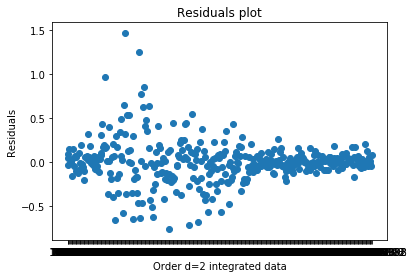

In [82]:
plt.scatter(x=training_data[2:], y=best_model.resid);
plt.title('Residuals plot')
plt.xlabel('Order d=2 integrated data')
plt.ylabel('Residuals')

In [94]:
simple_model = ARIMA(training_data,(2,2,2)).fit()

Text(0,0.5,'Residuals')

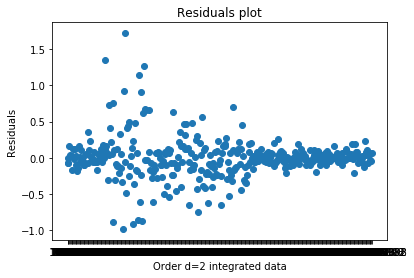

In [98]:
plt.scatter(x=training_data[2:], y=simple_model.resid);
plt.title('Residuals plot')
plt.xlabel('Order d=2 integrated data')
plt.ylabel('Residuals')

In [102]:
simple_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
=====================================================================
Model:               ARIMA            BIC:                 149.8076  
Dependent Variable:  D2.CSUSHPINSA    Log-Likelihood:      -57.068   
Date:                2019-12-20 18:00 Scale:               1.0000    
No. Observations:    382              Method:              css-mle   
Df Model:            5                Sample:              03-01-1987
Df Residuals:        377                                   12-01-2018
Converged:           1.0000           S.D. of innovations: 0.280     
AIC:                 126.1351         HQIC:                135.527   
---------------------------------------------------------------------
                     Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const               -0.0004   0.0109   -0.0345 0.9725 -0.0218  0.0211
ar.L1.D2.CSUSHPINSA  1.7222   0.0072  237.7126 0.0000  1.7080  1.7364
ar.L2.D2.CSUSHPINSA -0.9898   0.0069 -144.1198 0.0000 -1.0033 -0.9764
ma.L1.D2.CSUSHPINSA -1.6835   0.0288  -58.3589 0.0000 -1.7401 -1.6270
ma.L2.D2.CSUSHPINSA  0.8878   0.0348   25.5437 0.0000  0.8197  0.9559
-------------------------------------------------------------------------------
                Real            Imaginary           Modulus           Frequency
-------------------------------------------------------------------------------
AR.1           0.8699             -0.5035            1.0051             -0.0835
AR.2           0.8699              0.5035            1.0051              0.0835
MA.1           0.9482             -0.4768            1.0613             -0.0742
MA.2           0.9482              0.4768            1.0613              0.0742
=====================================================================

"""

In [90]:
def mean_abs_pct_error(actual_values, forecast_values):
    err=0
    for i in range(len(forecast_values)):
        err += np.abs(actual_values.values[i] - forecast_values.values[i])/actual_values.values[i]
    return err[0] * 100/len(forecast_values)

In [96]:
complex_model_preds = best_model.predict(start='2019-01-01', end='2019-09-01', dynamic=True, typ='levels')
np.round(mean_abs_pct_error(test_data, complex_model_preds),3)

1.554

In [97]:
simple_model_preds = model.predict(start='2019-01-01', end='2019-09-01', dynamic=True, typ='levels')
np.round(mean_abs_pct_error(test_data, simple_model_preds),3)

1.585

In [126]:
simple_model_preds

2019-01-01    205.264881
2019-02-01    205.703527
2019-03-01    206.121443
2019-04-01    206.406885
2019-05-01    206.484703
2019-06-01    206.336077
2019-07-01    206.002988
2019-08-01    205.576357
2019-09-01    205.171220
Freq: MS, dtype: float64

In [127]:
test_data

,CSUSHPINSA
DATE,
2019-01-01,204.445
2019-02-01,204.693
2019-03-01,206.036
2019-04-01,207.943
2019-05-01,209.624
2019-06-01,210.843
2019-07-01,211.585
2019-08-01,211.947
2019-09-01,212.203


In [120]:
np.shape(training_data.values.reshape(384))

(384,)

In [122]:
np.shape(simple_model.resid)

(382,)

In [128]:
complex_model_preds

2019-01-01    205.075021
2019-02-01    205.622443
2019-03-01    206.254085
2019-04-01    206.661521
2019-05-01    206.762941
2019-06-01    206.389826
2019-07-01    205.915947
2019-08-01    205.501546
2019-09-01    205.193451
Freq: MS, dtype: float64

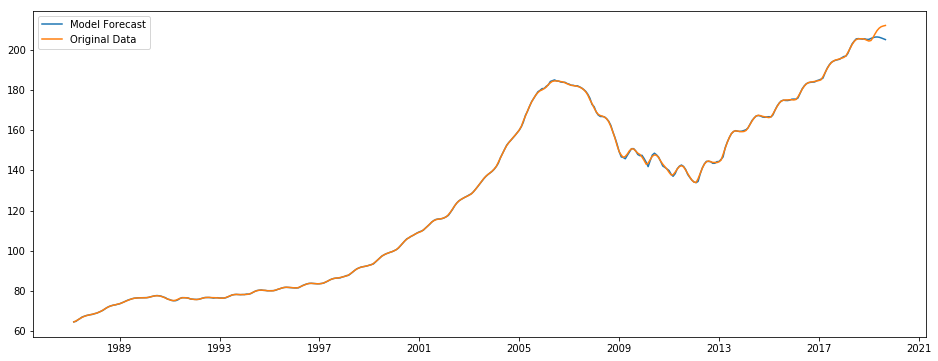

In [133]:
model_data = training_data.values.reshape(384)[2:] - simple_model.resid
model_data = pd.concat((model_data,simple_model_preds))
plt.figure(figsize=(16,6));
plt.plot(model_data);
plt.plot(original_data[2:]);
plt.legend(['Model Forecast','Original Data']);